In [1]:
#MLP to predict next char in sequence. 
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #for figs
%matplotlib inline

In [ ]:
words = open('../Lectures/lecture 2/names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [8]:
#building the vocab of chars and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [138]:
def build_dataset(words):
    block_size = 4
    X,Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182512, 4]) torch.Size([182512])
torch.Size([22860, 4]) torch.Size([22860])
torch.Size([22774, 4]) torch.Size([22774])


In [155]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,20), generator=g)
W1 = torch.randn((80,400),generator=g)
b1 = torch.randn(400,generator=g)
W2 = torch.randn((400,27),generator=g)
b2= torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [156]:
sum(p.nelement() for p in parameters) #number of params total for model :=)

43767

In [157]:
for p in parameters:
    p.requires_grad = True

In [160]:
print(W1.shape)

torch.Size([80, 400])


In [159]:
lri = []
lossi = []
stepi = []
i_global = 0

In [161]:
for i in range(100000):
#forward pass
    i_global += 1
    #mninibatch construct
    ix = torch.randint(0,Xtr.shape[0], (128,)) 
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,80)@W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits,Ytr[ix]) 

    #backward pass! 
    for p in parameters:
        p.grad = None
    loss.backward()
    #lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    #tracking stats to find best LR
    stepi.append(i_global)
    #lri.append(lrE[i])
    lossi.append(loss.item())

print("Final:" + str(loss.item()))

Final:2.1561949253082275


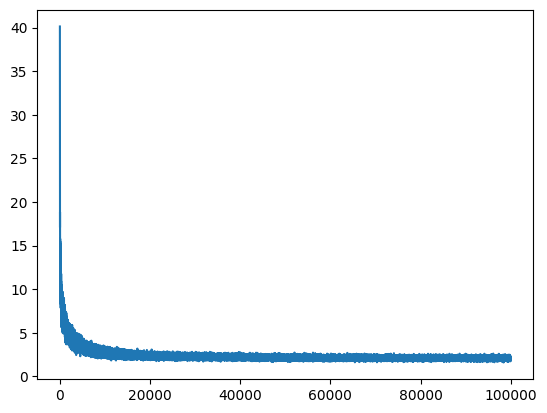

In [162]:
plt.plot(stepi,lossi)

In [163]:
#let's evaluate for Xdev and Ydev
emb = C[Xdev]
h = torch.tanh(emb.view(-1,80)@W1 + b1) #(32,100)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.2181, grad_fn=<NllLossBackward0>)

In [164]:
#let's evaluate for Xte and Yte
emb = C[Xte]
h = torch.tanh(emb.view(-1,80)@W1 + b1) #(32,100)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits,Yte)
loss

tensor(2.2317, grad_fn=<NllLossBackward0>)

In [154]:
block_size = 4

In [137]:
#Let's sample the model finally and enjoy the fruits of our labour
#g = torch.Generator().manual_seed(2147483647+10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1)@ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        #ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        ix = torch.multinomial(probs,num_samples=1).item()

        context = context[1:]+ [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

zynar.
azieb.
chewen.
mahsle.
lana.
edva.
dadin.
karhee.
souliena.
anaelani.
jayveon.
malty.
gazita.
getron.
hafier.
madia.
daren.
akebtethy.
ara.
hepheld.
